# Modular Divison

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `KaliskiModInverse`
Compute modular multiplicative inverse -inplace- of numbers in montgomery form.

Applies the transformation
$$
    \ket{x} \ket{0} \rightarrow \ket{x^{-1} 2^{2n} \mod p} \ket{\mathrm{garbage}}
$$

#### Parameters
 - `bitsize`: size of the number.
 - `mod`: The integer modulus.
 - `uncompute`: whether to compute or uncompute. 

#### Registers
 - `x`: The register for which we compute the multiplicative inverse.
 - `m`: A 2*bitsize register of intermediate values needed for uncomputation. 

#### References
 - [Performance Analysis of a Repetition Cat Code Architecture: Computing 256-bit Elliptic Curve Logarithm in 9 Hours with 126 133 Cat Qubits](https://arxiv.org/abs/2302.06639).     Appendix C5.
 - [Improved quantum circuits for elliptic curve discrete logarithms](https://arxiv.org/abs/2001.09580).     Fig 7(b)
 - [How to compute a 256-bit elliptic curve private key with only 50 million Toffoli gates](https://arxiv.org/abs/2306.08585).     page 8.


In [2]:
from qualtran.bloqs.mod_arithmetic import KaliskiModInverse

### Example Instances

In [3]:
kaliskimodinverse_example = KaliskiModInverse(32, 10**9 + 7)

In [4]:
n, p = sympy.symbols('n p')
kaliskimodinverse_symbolic = KaliskiModInverse(n, p)

#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([kaliskimodinverse_example, kaliskimodinverse_symbolic],
           ['`kaliskimodinverse_example`', '`kaliskimodinverse_symbolic`'])

### Call Graph

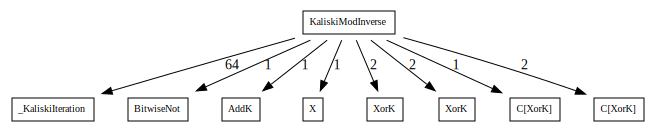

#### Counts totals:
 - `AddK`: 1
 - `BitwiseNot`: 1
 - `C[XorK]`: 1
 - `C[XorK]`: 2
 - `X`: 1
 - `XorK`: 2
 - `XorK`: 2
 - `_KaliskiIteration`: 64

In [6]:
from qualtran.resource_counting.generalizers import ignore_split_join
kaliskimodinverse_example_g, kaliskimodinverse_example_sigma = kaliskimodinverse_example.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(kaliskimodinverse_example_g)
show_counts_sigma(kaliskimodinverse_example_sigma)